In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import datetime
import json
from pprint import pprint
from IPython.core import display as ICD  # to print multiple nice pandas tables
from collections import defaultdict
import logging
import numpy as np
import io
import gensim
from tqdm import tqdm_notebook, tnrange
import tqdm
import pandas as pd
from itertools import groupby
import seaborn as sns
sns.set()

In [2]:
import datasets
import classify
from simple_model import SimpleModel
from testing import test_simple_model

In [9]:
from collections import defaultdict
results = defaultdict(dict)

# super naiv benchmark

# Testing lsa + custom logistic regression 

We see real decrease against sklearn classsifier in some tasks. In CR and MPQAD we hit the baseline, which is bad.

# Try improwing $w$ with gradient

In [22]:
raw_results = defaultdict(dict)

In [23]:
def gradient_w(model, dataset, alpha=0.01, epochs=150):
    train_scores = []
    test_scores = []
    model.fit(dataset.train_samples(), dataset.train_labels())
    if epochs is None:
        t = tnrange(100000)
    else:
        t = tnrange(epochs)
    for e in t:
        w = np.copy(model.w)
        w -= alpha * model.dw(dataset.train_samples(), dataset.train_labels())
        model.w = np.copy(w)
        model.fit(dataset.train_samples(), dataset.train_labels())
        train_score = model.score(dataset.train_samples(), dataset.train_labels())
        test_score = model.score(dataset.test_samples(), dataset.test_labels())
        train_scores.append(train_score)
        test_scores.append(test_score)
        t.set_postfix(train_score=train_score, test_score=test_score)
        if epochs is None and e > 20:
            end_mean = np.mean(train_scores[-10:])
            previos_mean = np.mean(train_scores[-20:-10])
            t.set_postfix(train_score=train_score, test_score=test_score, previos=previos_mean, end=end_mean)
            if end_mean < previos_mean:
                break
    plt.plot(train_scores,)
    plt.plot(test_scores)
    plt.legend(['train', 'test'])
    return train_scores, test_scores

In [24]:
def test_simple_model_with_gradient(model, dataset, gradient_iters=150, alpha=0.01, tag=None):
    train_ps, test_ps = gradient_w(model, dataset, alpha, gradient_iters)
    train_p = model.score(dataset.train_samples(), dataset.train_labels())
    test_p = model.score(dataset.test_samples(), dataset.test_labels())
    if tag is not None:
        results[dataset.name()][('gradientw', tag, alpha)] = (train_p, test_p)
        raw_results[dataset.name()][('gradientw', tag, alpha)] = (train_ps, test_ps)
    plt.show()
    print(dataset.name())
    print("Train precision", train_p)
    print("Test precision", test_p)

# Precision of model when we do not update $w$

it is basically 150 fits of LSA + logistic regression

In [25]:
models = {}

HBox(children=(IntProgress(value=0), HTML(value='')))

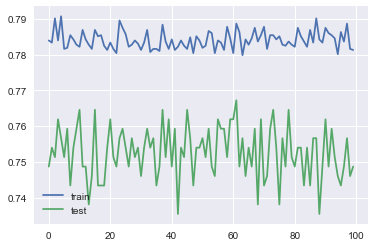

CRDataset
Train precision 0.7812775978804828
Test precision 0.7486772486772486


HBox(children=(IntProgress(value=0), HTML(value='')))

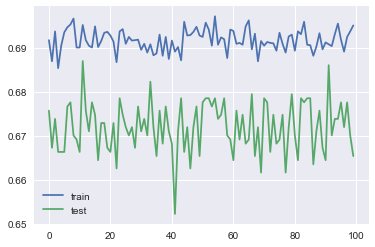

MRDataset
Train precision 0.695049504950495
Test precision 0.6654170571696345


HBox(children=(IntProgress(value=0), HTML(value='')))

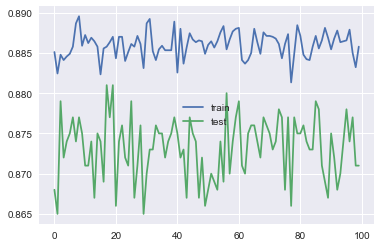

SUBJDataset
Train precision 0.8857777777777778
Test precision 0.871


HBox(children=(IntProgress(value=0), HTML(value='')))

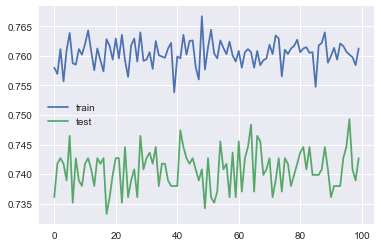

MPQADataset
Train precision 0.761236249345207
Test precision 0.7426955702167766


In [26]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier())
    test_simple_model_with_gradient(model, dataset, alpha=0, tag='default', gradient_iters=100)
    models[(dataset.name(), 'no_w')] = model


# Precision, when we do update w

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

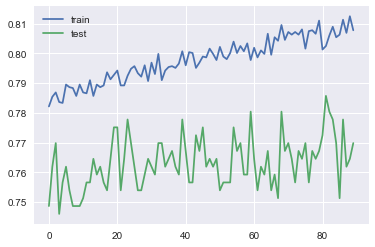

CRDataset
Train precision 0.8077715631439506
Test precision 0.7698412698412699


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-28:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



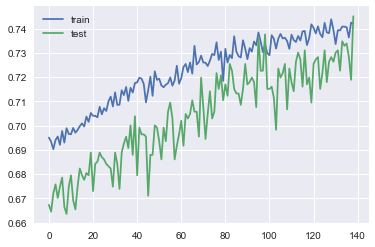

MRDataset
Train precision 0.7421573736321001
Test precision 0.7450796626054358


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

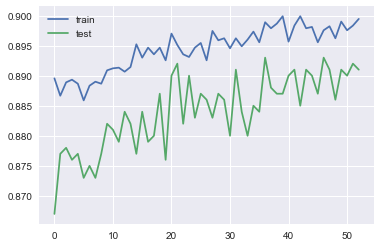

SUBJDataset
Train precision 0.8994444444444445
Test precision 0.891


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-29:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



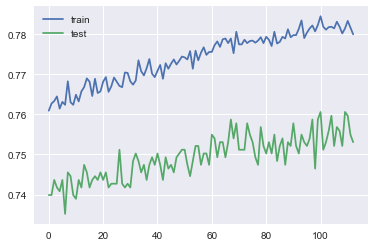

MPQADataset
Train precision 0.7799895233106339
Test precision 0.7530631479736098


In [27]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier())
    test_simple_model_with_gradient(model, dataset, gradient_iters=None, alpha=0.01, tag='default')
    models[(dataset.name(), 'update_w')] = model

update with smaller $\alpha$

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

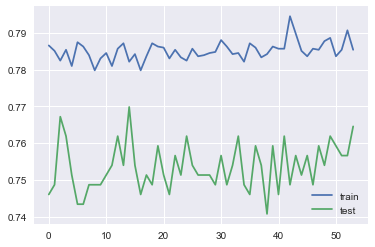

CRDataset
Train precision 0.7853988813659111
Test precision 0.7645502645502645


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-30:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



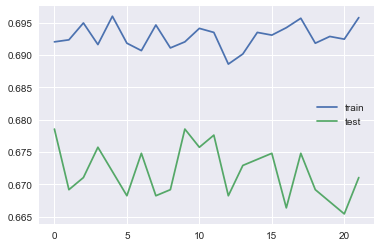

MRDataset
Train precision 0.6957790515893695
Test precision 0.6710402999062792


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

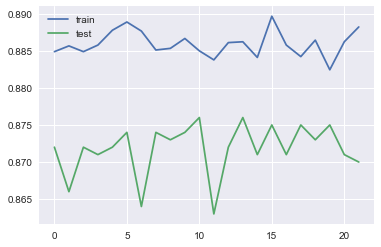

SUBJDataset
Train precision 0.8882222222222222
Test precision 0.87


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-31:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



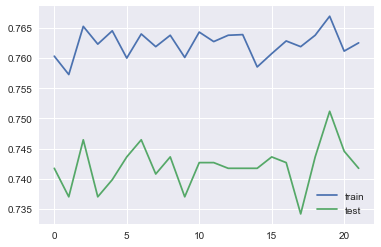

MPQADataset
Train precision 0.7624934520691462
Test precision 0.7417530631479736


In [28]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier())
    test_simple_model_with_gradient(model, dataset, None, alpha=0.001, tag='default')

# Use tfidf, then $w$

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

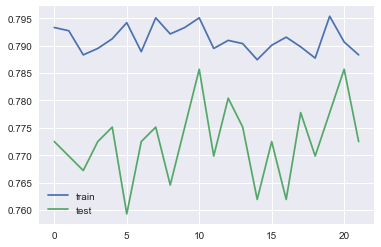

CRDataset
Train precision 0.7883426552840742
Test precision 0.7724867724867726


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



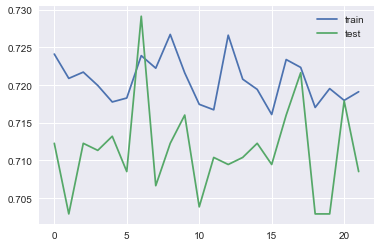

MRDataset
Train precision 0.7191245440333507
Test precision 0.7085285848172447


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

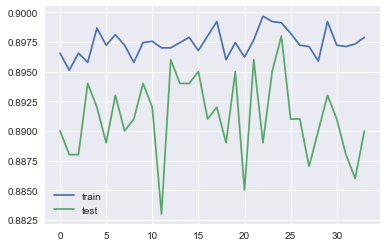

SUBJDataset
Train precision 0.8978888888888888
Test precision 0.89


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-33:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



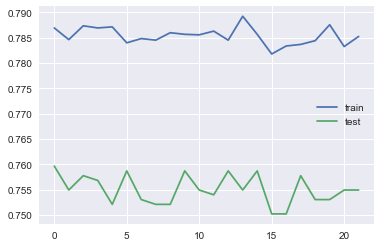

MPQADataset
Train precision 0.785227867993714
Test precision 0.7549481621112158


In [29]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier(), use_tfidf=True)
    test_simple_model_with_gradient(model, dataset, None, alpha=0, tag='tfidf')
    models[(dataset.name(), 'tfidf')] = model

# Use tfidf, then updating $w$

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

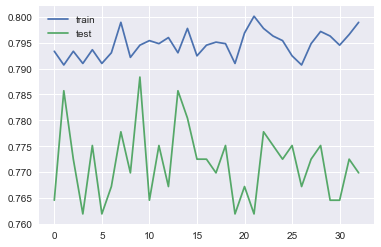

CRDataset
Train precision 0.7989402413894613
Test precision 0.7698412698412699


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-34:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



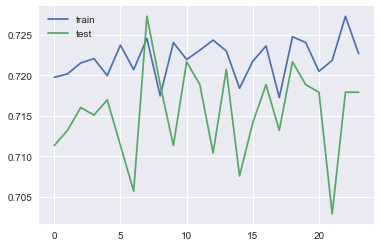

MRDataset
Train precision 0.7226680562793122
Test precision 0.7179006560449859


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

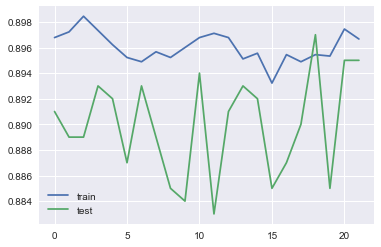

SUBJDataset
Train precision 0.8966666666666667
Test precision 0.895


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



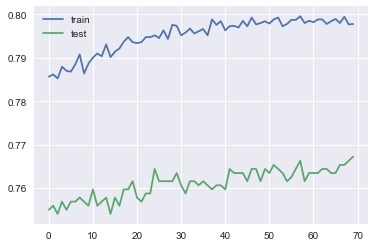

MPQADataset
Train precision 0.7977998952331063
Test precision 0.767200754005655


In [30]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier(), use_tfidf=True)
    test_simple_model_with_gradient(model, dataset, None, alpha=0.01, tag='update_tfidf')
    models[(dataset.name(), 'update_w_tfidf')] = model

updating with smaller $\alpha$

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

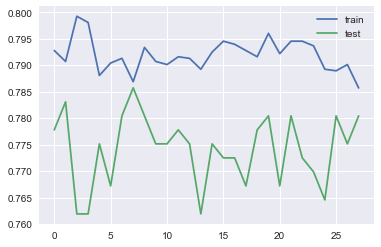

CRDataset
Train precision 0.7856932587577274
Test precision 0.7804232804232805


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-36:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



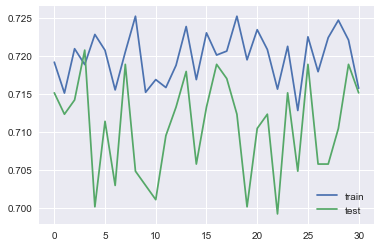

MRDataset
Train precision 0.7156852527358
Test precision 0.7150890346766635


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

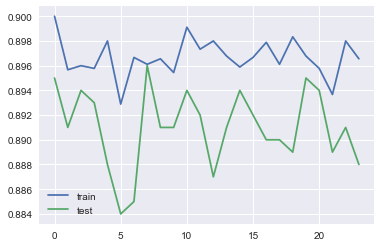

SUBJDataset
Train precision 0.8965555555555556
Test precision 0.888


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-37:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



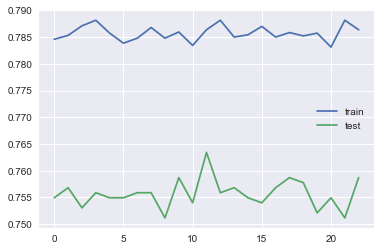

MPQADataset
Train precision 0.7863803038239916
Test precision 0.758718190386428


In [31]:
all_datasets = [datasets.CRDataset(), datasets.MRDataset(), datasets.SUBJDataset(), datasets.MPQADataset()]
for dataset in all_datasets:
    model = SimpleModel(classify.SkClassifier(), use_tfidf=True)
    test_simple_model_with_gradient(model, dataset, None, alpha=0.001, tag='update_tfidf')

In [32]:
models

{('CRDataset', 'no_w'): <__main__.SimpleModel at 0x7f14472710b8>,
 ('CRDataset', 'tfidf'): <__main__.SimpleModel at 0x7f14349d2748>,
 ('CRDataset', 'update_w'): <__main__.SimpleModel at 0x7f1446e900b8>,
 ('CRDataset', 'update_w_tfidf'): <__main__.SimpleModel at 0x7f1436cc5518>,
 ('MPQADataset', 'no_w'): <__main__.SimpleModel at 0x7f1446e87cc0>,
 ('MPQADataset', 'tfidf'): <__main__.SimpleModel at 0x7f1436ef15c0>,
 ('MPQADataset', 'update_w'): <__main__.SimpleModel at 0x7f1446f15048>,
 ('MPQADataset', 'update_w_tfidf'): <__main__.SimpleModel at 0x7f1436a4db00>,
 ('MRDataset', 'no_w'): <__main__.SimpleModel at 0x7f1446d4e518>,
 ('MRDataset', 'tfidf'): <__main__.SimpleModel at 0x7f14474920f0>,
 ('MRDataset', 'update_w'): <__main__.SimpleModel at 0x7f144748eba8>,
 ('MRDataset', 'update_w_tfidf'): <__main__.SimpleModel at 0x7f14350ce748>,
 ('SUBJDataset', 'no_w'): <__main__.SimpleModel at 0x7f1447c26898>,
 ('SUBJDataset', 'tfidf'): <__main__.SimpleModel at 0x7f1436ef4048>,
 ('SUBJDataset', '

In [33]:
def print_words(model):
    joined = [(model.w[i], model.dictionary.id2token[i]) for i in range(len(model.w))]
    print(sorted(joined)[:10])
    print(sorted(joined, reverse=True)[:10])


In [34]:
print_words(models[('CRDataset', 'update_w')])             

[(0.1958321817986054, 'i'), (0.5621548872191292, 'diaper'), (0.5639000781218434, 'camera'), (0.5691017001125337, 'and'), (0.595129941088664, '3'), (0.6105413639226646, 'am'), (0.633764697532169, 'small'), (0.6362860019899734, '!'), (0.6945220803202128, 'very'), (0.7119424420386795, 'does')]
[(1.548298560305193, "'t"), (1.3756601794475503, 'slow'), (1.369075009772326, 'plus'), (1.3432440484411412, 'good'), (1.3380255076112437, 'flaw'), (1.3305812737595328, 'bit'), (1.3291662204128794, 'perfect'), (1.3140891919020676, 'excellent'), (1.2861668083668847, 'the'), (1.2688756406031352, 'to')]


In [35]:
print_words(models[('CRDataset', 'update_w_tfidf')])

[(0.9064977537493324, ','), (0.9226295894025829, 'is'), (0.93476698632133, 'for'), (0.9450397438472379, 'this'), (0.9452326887480961, 'it'), (0.9613493092465948, 'has'), (0.9687285231512498, 'very'), (0.9748752187084718, 'screen'), (0.9758745587397967, 'say'), (0.977369547770482, 'antivirus')]
[(1.723764088228984, 'not'), (1.6698258156570724, 'only'), (1.4901695175851368, 'great'), (1.414927800725883, "'t"), (1.3727976950345704, 'easy'), (1.2841017102086867, 'good'), (1.2642506867305832, 'after'), (1.2293430363849338, 'but'), (1.226659400382022, 'excellent'), (1.1860872459192413, 'bit')]


In [1]:
vanila_w_neg = [(0.1958321817986054, 'i'), (0.5621548872191292, 'diaper'), (0.5639000781218434, 'camera'), (0.5691017001125337, 'and'), (0.595129941088664, '3'), (0.6105413639226646, 'am'), (0.633764697532169, 'small'), (0.6362860019899734, '!'), (0.6945220803202128, 'very'), (0.7119424420386795, 'does')]
vanila_w_poz = [(1.548298560305193, "'t"), (1.3756601794475503, 'slow'), (1.369075009772326, 'plus'), (1.3432440484411412, 'good'), (1.3380255076112437, 'flaw'), (1.3305812737595328, 'bit'), (1.3291662204128794, 'perfect'), (1.3140891919020676, 'excellent'), (1.2861668083668847, 'the'), (1.2688756406031352, 'to')]


In [2]:
tfidf_neg = [(0.9064977537493324, ','), (0.9226295894025829, 'is'), (0.93476698632133, 'for'), (0.9450397438472379, 'this'), (0.9452326887480961, 'it'), (0.9613493092465948, 'has'), (0.9687285231512498, 'very'), (0.9748752187084718, 'screen'), (0.9758745587397967, 'say'), (0.977369547770482, 'antivirus')]
tfidf_poz = [(1.723764088228984, 'not'), (1.6698258156570724, 'only'), (1.4901695175851368, 'great'), (1.414927800725883, "'t"), (1.3727976950345704, 'easy'), (1.2841017102086867, 'good'), (1.2642506867305832, 'after'), (1.2293430363849338, 'but'), (1.226659400382022, 'excellent'), (1.1860872459192413, 'bit')]


In [5]:
round(0.93,2)

0.93

In [20]:
def report_words(wpoz, wneg):
    for v, w in wpoz:
        print("{:.2f}: {}".format(v, w))
    print()
    for v, w in wneg:
        print("{:.2f}: {}".format(v, w))
    

In [21]:
report_words(vanila_w_poz, vanila_w_neg)

1.55: 't
1.38: slow
1.37: plus
1.34: good
1.34: flaw
1.33: bit
1.33: perfect
1.31: excellent
1.29: the
1.27: to

0.20: i
0.56: diaper
0.56: camera
0.57: and
0.60: 3
0.61: am
0.63: small
0.64: !
0.69: very
0.71: does


In [22]:
report_words(tfidf_poz, tfidf_neg)

1.72: not
1.67: only
1.49: great
1.41: 't
1.37: easy
1.28: good
1.26: after
1.23: but
1.23: excellent
1.19: bit

0.91: ,
0.92: is
0.93: for
0.95: this
0.95: it
0.96: has
0.97: very
0.97: screen
0.98: say
0.98: antivirus
